# 엣지검출 (Edge Detection)

- 엣지(edge)
    - 배경과 물체 또는 물체와 물체간의 경계를 말한다.
- 엣지 검출
    - 엣지는 경계가 되는 부분으로 픽셀값이 급격하게 변하게 되므로 그 변화되는 픽셀들을 찾아낸다.
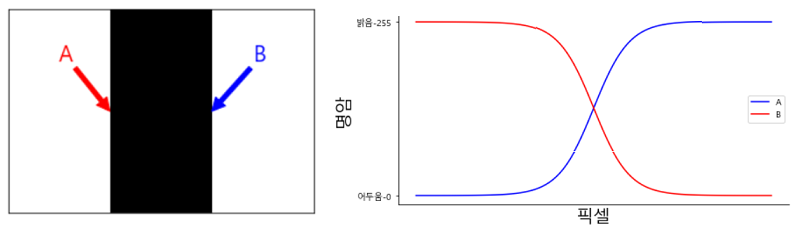
   
   - 엣지 검출을 통해 물체들의 윤곽만 남기고 필요없는 물체나 배경은 제거할 수 있다.
   - Edge detection은 noise의 영향을 많이 받아 일반적으로 blur를 수행 한 후에 Edge detection을 수행

### 엣지 검출과 미분
- 픽셀값의 차이가 큰 부분을 엣지로 판단 하므로 연속된 픽셀값에 미분을 해서 찾아낸다.  
- 그러나 영상의 픽셀값들은 특정 함수에 의해 구해진 값들이 아니므로 미분 근사값을 이용해 구해야 한다.

#### 1차 미분의 근사화
- 전진 차분(Forward difference)
    - $\cfrac{\partial{f}}{\partial{x}}\;\cong\;\cfrac{f(x+h) - f(x)}{h}$
- 후진 차분(Backward difference)
    - $\cfrac{\partial{f}}{\partial{x}}\;\cong\;\cfrac{f(x) - f(x-h)}{h}$
- 중앙 차분(Centered difference)
    - $\cfrac{\partial{f}}{\partial{x}}\;\cong\;\cfrac{f(x+h) - f(x-h)}{2h}$
- 엣지 검출에서는 **중앙 차분**을 사용하며 **h(X의 변화)은 픽셀을 말하며** 이전 픽셀 또는 이후 픽셀과의 차이를 확인하는 것이므로 1로 볼 수 있다. 그러나 우리는 변화율을 보는 것이 목적이므로 1/2로 곱하는 것은 하지 않는다.
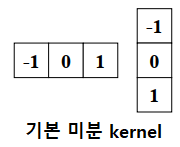

- 주요 미분 커널
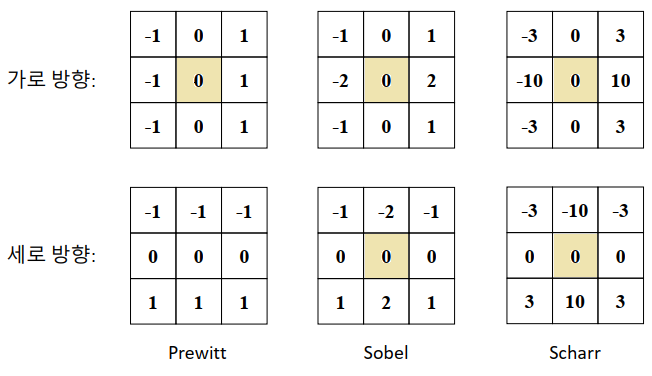

#### 소벨 필터 직접 만들어서 적용

In [6]:
import cv2
import numpy as np

sudoku = cv2.imread('./images/sudoku.jpg')

kernel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])  #가로방향
kernel_y = np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [-1, 2, 1]])  #세로방향

x_edge = cv2.filter2D(sudoku, -1, kernel_x) #-1 출력결과의 타입: 01은 입력과 동일한 타입
y_edge = cv2.filter2D(sudoku, -1, kernel_y)
edge = cv2.add(x_edge, y_edge)

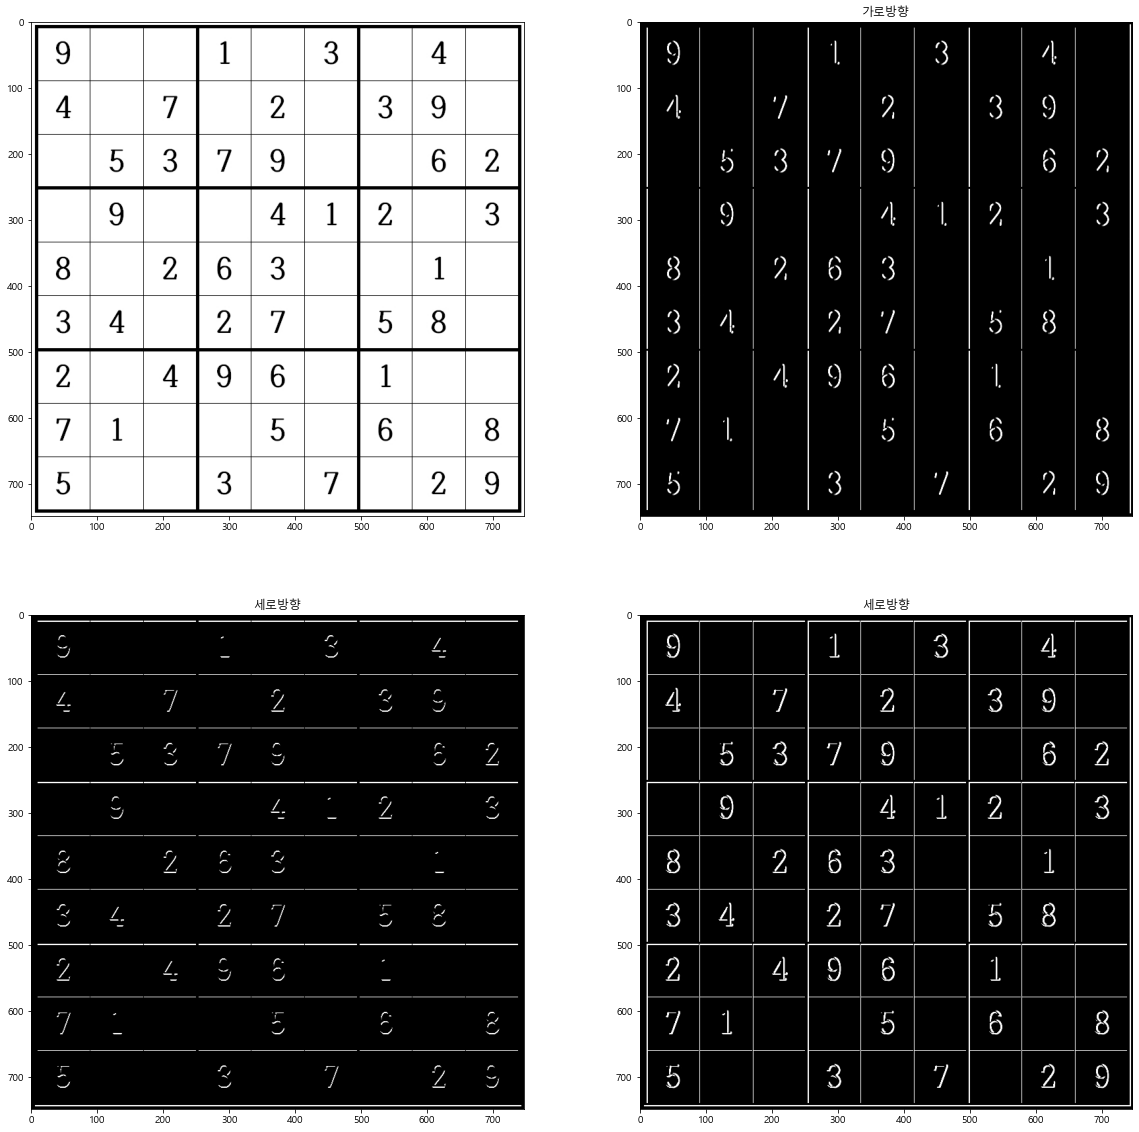

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
row, col = 2, 2
plt.subplot(row, col, 1)
plt.imshow(sudoku, cmap='gray')

plt.subplot(row, col, 2)
plt.imshow(x_edge, cmap='gray')
plt.title('가로방향')

plt.subplot(row, col, 3)
plt.imshow(y_edge, cmap='gray')
plt.title('세로방향')

plt.subplot(row, col, 4)
plt.imshow(edge, cmap='gray')
plt.title('세로방향')


plt.show()

### sobel 함수 이용
- **`cv2.Sobel(src, ddepth, dx, dy, ksize, scale, delta)`**
    - src: 엣지를 검출할 영상
    - ddepth: 출력 영상의 타입. -1로 지정하면 입력영상과 같은 타입 사용.
    - dx, dy: x/y 방향 미분의 차수
        - dx=1, dy=0 : 가로방향
        - dx=0, dy=1 : 세로방향
    - ksize: 커널의 크기. 보통 3으로 준다.
    - scale: 연산결과에 추가적으로 곱할값. Default: 1
    - delta: 연산결과에 추가적으로 더할값. Default: 0
- **`cv2.magnitude(x, y)`**
    - x방향, y방향 필터 결과(미분결과)를 합치는 함수
    - x: x방향 미분 결과
    - y: y방향 미분 결과

In [28]:
lenna = cv2.imread('./images/lenna.bmp', cv2.IMREAD_GRAYSCALE)

# sb_x = cv2.Sobel(lenna, #원본
#                  -1, #출력타입. -1은 입력과 동일한 타입
#                  1, #x 방향 미분,
#                  0, #y 방향 미분,
#                  ksize=3, #커널 사이즈 (3,3),
# #                  delta=128
#                  )
# sb_y = cv2.Sobel(lenna, -1, 0, 1, ksize=3,) #delta=128)

sb_x = cv2.Sobel(lenna, cv2.CV_32F, 1, 0, ksize=3)
sb_y = cv2.Sobel(lenna, cv2.CV_32F, 0, 1, ksize=3)
# x, y방향 엣지를 합치기
mag = cv2.magnitude(sb_x, sb_y)


threshold = 100
edge = np.zeros_like(mag)
edge[mag > threshold] = 255 #pixel값이 threshold 초과인 것은 255, 나머지는 0


edge_x = np.clip(sb_x, 0, 255).astype(np.uint8)
edge_y = np.clip(sb_y, 0, 255).astype(np.uint8)
# edge = np.clip(mag, 0, 255).astype(np.uint8)
edge = edge.astype(np.uint8)

In [20]:
np.min(mag), np.max(mag), np.min(sb_x), np.max(sb_x)

(0.0, 709.0741, -688.0, 640.0)

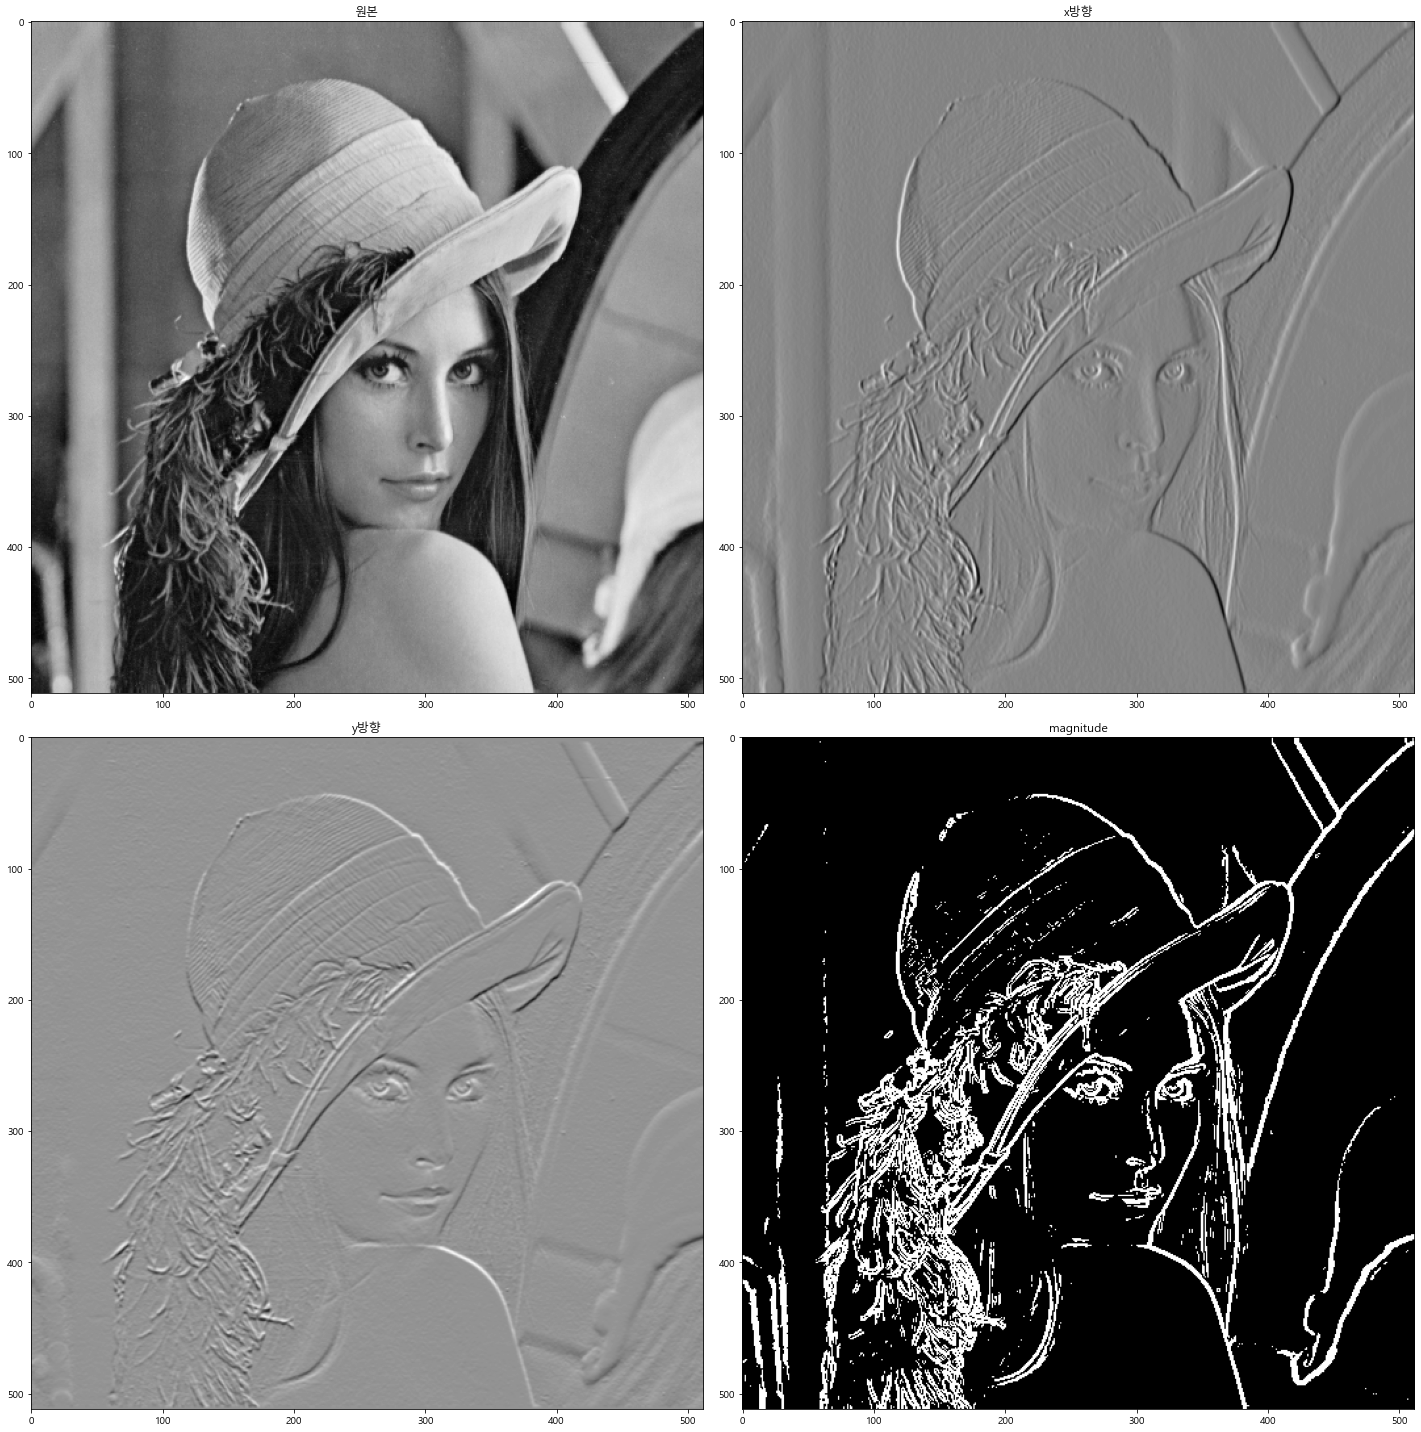

In [29]:
plt.figure(figsize=(20,20))
row, col = 2, 2

plt.subplot(row, col, 1)
plt.imshow(lenna, cmap='gray')
plt.title('원본')

plt.subplot(row, col, 2)
plt.imshow(sb_x, cmap='gray')
plt.title('x방향')

plt.subplot(row, col, 3)
plt.imshow(sb_y, cmap='gray')
plt.title('y방향')

plt.subplot(row, col, 4)
plt.imshow(edge, cmap='gray')
plt.title('magnitude')

plt.tight_layout()
plt.show()

### Canny
- Noise에 강한 edge detection
1. Gaussian blur를 수행해 noise를 제거
2. x, y축으로 gradient 계산
3. Gradient 의 방향을 계산 후 sobel filtering
4. Non-Maximum Suppession(NMS) 수행해서 엣지가 두꺼워지는 것을 방지
    - 주위(local)에서 가장 큰 값들만 남긴다.
5. Doubling thresholding
    - low threshold, high threshold를 기준으로 값들 제거
    - low threshold 이하의 값들 제거
    - low와 high threshold 사이의 값들은 high threshold와 연결된 것만 남기고 연결 안된것은 제거
        - 약한 edge
    - high threshold 이상의 값들은 유지
        - 강한 edge
        
     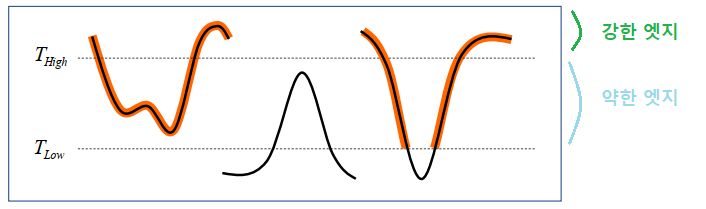

- `cv2.Canny(image, threshold1, threshold2, apertureSize=None)`
    - image: Canny 엣지 검출을 할 원본 이미지
    - threshold1: low threshold
    - threshold2: high threshold
        - threshold1과 threshold2 는 1:2 또는 1:3 정도 비율로 준다.
    - apertureSize: 소벨필터의 커널크기. default: 3

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

lenna = cv2.imread('./images/lenna.bmp', cv2.IMREAD_GRAYSCALE)


In [31]:
canny_img = cv2.Canny(lenna, 50, 150)  #low th: 50, high th: 150
canny_img2 = cv2.Canny(lenna, 50, 200)

In [32]:
cv2.imshow('canny', canny_img)
cv2.imshow('canny2', canny_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()